In [3]:

import pandas as pd
import numpy as np
import re
import nltk
import matplotlib
import matplotlib.pyplot as plt



In [5]:

corpus = [
    'The sky is blue and beautiful.', 'Love this blue and beautiful sky!',
    'The quick brown fox jumps over the lazy dog.',
    "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
    'I love green eggs, ham, sausages and bacon!',
    'The brown fox is quick and the blue dog is lazy!',
    'The sky is very blue and the sky is very beautiful today',
    'The dog is lazy but the brown fox is quick!'
]


labels = [
    'weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather',
    'animals'
]


corpus = np.array(corpus) # np.array better than list
corpus_df = pd.DataFrame({'Document': corpus, 'Category': labels})
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, e...",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beaut...,weather
7,The dog is lazy but the brown fox is quick!,animals


In [6]:
## Colab Only
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')


def normalize_document(doc):
    """
    Normalize the document.

    Parameters:
    - doc (list): A list of documents

    Returns:
    list: a list of preprocessed documents

    """

    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I | re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc


normalize_corpus = np.vectorize(normalize_document)

In [8]:
norm_corpus = normalize_corpus(corpus)
print(corpus)
print("="*50)
print(norm_corpus)

['The sky is blue and beautiful.' 'Love this blue and beautiful sky!'
 'The quick brown fox jumps over the lazy dog.'
 "A king's breakfast has sausages, ham, bacon, eggs, toast and beans"
 'I love green eggs, ham, sausages and bacon!'
 'The brown fox is quick and the blue dog is lazy!'
 'The sky is very blue and the sky is very beautiful today'
 'The dog is lazy but the brown fox is quick!']
['sky blue beautiful' 'love blue beautiful sky'
 'quick brown fox jumps lazy dog'
 'kings breakfast sausages ham bacon eggs toast beans'
 'love green eggs ham sausages bacon' 'brown fox quick blue dog lazy'
 'sky blue sky beautiful today' 'dog lazy brown fox quick']


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
# get bag of words features in sparse format
cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix

<8x20 sparse matrix of type '<class 'numpy.int64'>'
	with 42 stored elements in Compressed Sparse Row format>

### `TfidfTransformer()` from `sklearn`

In [10]:
from sklearn.feature_extraction.text import TfidfTransformer

tt = TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True)
tt_matrix = tt.fit_transform(cv_matrix)

tt_matrix = tt_matrix.toarray()
vocab = cv.get_feature_names_out()
pd.DataFrame(np.round(tt_matrix, 2), columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


### `TfidfVectorizer()` from `sklearn`

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0.,
                     max_df=1.,
                     norm='l2',
                     use_idf=True,
                     smooth_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names_out()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


### Intuition of TF-IDF

The following shows the creation and computation of the TFIDF matrix step by step.

#### Create Vocabulary Dictionary of the Corpus

In [12]:
# get unique words as feature names
unique_words = list(
    set([word for doc in [doc.split() for doc in norm_corpus]
         for word in doc]))

# default dict
def_feature_dict = {w: 0 for w in unique_words}

print('Feature Names:', unique_words)
print('Default Feature Dict:', def_feature_dict)

Feature Names: ['quick', 'toast', 'green', 'beautiful', 'fox', 'sky', 'jumps', 'dog', 'eggs', 'love', 'bacon', 'lazy', 'brown', 'blue', 'sausages', 'beans', 'breakfast', 'today', 'kings', 'ham']
Default Feature Dict: {'quick': 0, 'toast': 0, 'green': 0, 'beautiful': 0, 'fox': 0, 'sky': 0, 'jumps': 0, 'dog': 0, 'eggs': 0, 'love': 0, 'bacon': 0, 'lazy': 0, 'brown': 0, 'blue': 0, 'sausages': 0, 'beans': 0, 'breakfast': 0, 'today': 0, 'kings': 0, 'ham': 0}


#### Create Document-Word Matrix (Bag-of-Word Frequencies)

In [13]:
from collections import Counter
# build bag of words features for each document - term frequencies
bow_features = []
for doc in norm_corpus:
    bow_feature_doc = Counter(doc.split())
    # initialize default corpus dictionary
    all_features = Counter(def_feature_dict)

    # update default dict with current doc words
    bow_feature_doc.update(all_features)

    # append cur doc dict
    bow_features.append(bow_feature_doc)

bow_features = pd.DataFrame(bow_features)
bow_features

,sky,blue,beautiful,quick,toast,green,fox,jumps,dog,eggs,love,bacon,lazy,brown,sausages,beans,breakfast,today,kings,ham
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,1,0,1,1
4,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,1
5,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0
6,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0


#### Compute Document Frequency of Words

In [14]:
import scipy.sparse as sp
feature_names = list(bow_features.columns)

# build the document frequency matrix
df = np.diff(sp.csc_matrix(bow_features, copy=True).indptr)
# `csc_matrix()` compress `bow_features` into sparse matrix based on columns
# `csc_matrix.indices` stores the matrix value indices in each column
# `csc_matrix.indptr` stores the accumulative numbers of values from column-0 to the right-most column

df = 1 + df  # adding 1 to smoothen idf later

# show smoothened document frequencies
pd.DataFrame([df], columns=feature_names)

,sky,blue,beautiful,quick,toast,green,fox,jumps,dog,eggs,love,bacon,lazy,brown,sausages,beans,breakfast,today,kings,ham
0,4,5,4,4,2,2,4,2,4,3,3,3,4,4,3,2,2,2,2,3


#### Create Inverse Document Frequency of Words

In [15]:
# compute inverse document frequencies for each term
total_docs = 1 + len(norm_corpus)
idf = 1.0 + np.log(float(total_docs) / df)

# show smoothened idfs
pd.DataFrame([np.round(idf, 2)], columns=feature_names)

,sky,blue,beautiful,quick,toast,green,fox,jumps,dog,eggs,love,bacon,lazy,brown,sausages,beans,breakfast,today,kings,ham
0,1.81,1.59,1.81,1.81,2.5,2.5,1.81,2.5,1.81,2.1,2.1,2.1,1.81,1.81,2.1,2.5,2.5,2.5,2.5,2.1


In [16]:
tf = np.array(bow_features, dtype='float64')
tf

array([[1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
        1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
        0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 0., 0.],
       [2., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 0., 0.]])

#### Compute Raw TF-IDF for Each Document

In [17]:
# compute tfidf feature matrix
tf = np.array(bow_features, dtype='float64')
tfidf = tf * idf  ## `tf.shape` = (8,20),
# view raw tfidf feature matrix
pd.DataFrame(np.round(tfidf, 2), columns=feature_names)


,sky,blue,beautiful,quick,toast,green,fox,jumps,dog,eggs,love,bacon,lazy,brown,sausages,beans,breakfast,today,kings,ham
0,1.81,1.59,1.81,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,1.81,1.59,1.81,0.00,0.0,0.0,0.00,0.0,0.00,0.0,2.1,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00,0.00,0.00,1.81,0.0,0.0,1.81,2.5,1.81,0.0,0.0,0.0,1.81,1.81,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.00,0.00,0.00,2.5,0.0,0.00,0.0,0.00,2.1,0.0,2.1,0.00,0.00,2.1,2.5,2.5,0.0,2.5,2.1
4,0.00,0.00,0.00,0.00,0.0,2.5,0.00,0.0,0.00,2.1,2.1,2.1,0.00,0.00,2.1,0.0,0.0,0.0,0.0,2.1
5,0.00,1.59,0.00,1.81,0.0,0.0,1.81,0.0,1.81,0.0,0.0,0.0,1.81,1.81,0.0,0.0,0.0,0.0,0.0,0.0
6,3.62,1.59,1.81,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,2.5,0.0,0.0
7,0.00,0.00,0.00,1.81,0.0,0.0,1.81,0.0,1.81,0.0,0.0,0.0,1.81,1.81,0.0,0.0,0.0,0.0,0.0,0.0


#### Get L2 Norms of TF-IDF

In [18]:
from numpy.linalg import norm

# compute L2 norms
norms = norm(tfidf, axis=1)  # get the L2 forms of tfidf according to columns

# print norms for each document
print(np.round(norms, 3))

[3.013 3.672 4.761 6.534 5.319 4.35  5.019 4.049]


#### Compute Normalized TF-IDF for Each Document

In [19]:
# compute normalized tfidf
norm_tfidf = tfidf / norms[:, None]

# show final tfidf feature matrix
pd.DataFrame(np.round(norm_tfidf, 2), columns=feature_names)

,sky,blue,beautiful,quick,toast,green,fox,jumps,dog,eggs,love,bacon,lazy,brown,sausages,beans,breakfast,today,kings,ham
0,0.60,0.53,0.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
1,0.49,0.43,0.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
2,0.00,0.00,0.00,0.38,0.00,0.00,0.38,0.53,0.38,0.00,0.00,0.00,0.38,0.38,0.00,0.00,0.00,0.0,0.00,0.00
3,0.00,0.00,0.00,0.00,0.38,0.00,0.00,0.00,0.00,0.32,0.00,0.32,0.00,0.00,0.32,0.38,0.38,0.0,0.38,0.32
4,0.00,0.00,0.00,0.00,0.00,0.47,0.00,0.00,0.00,0.39,0.39,0.39,0.00,0.00,0.39,0.00,0.00,0.0,0.00,0.39
5,0.00,0.37,0.00,0.42,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.42,0.42,0.00,0.00,0.00,0.0,0.00,0.00
6,0.72,0.32,0.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.5,0.00,0.00
7,0.00,0.00,0.00,0.45,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.45,0.45,0.00,0.00,0.00,0.0,0.00,0.00


In [20]:
new_doc = 'the sky is green today'

pd.DataFrame(np.round(tv.transform([new_doc]).toarray(), 2),
             columns=tv.get_feature_names_out())

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.46,0.0,0.63


## Document Similarity

- Now each document in our corpus has been transformed into a **vectorized** representation using the naive Bag-of-Words method.
- And we believe that these vectorized representations are indicators of textual **semantics**.
- This vectorized text vectorization allows us to perform mathematical computation of the **semantic relationships** between documents.

### Similarity/Distance Metrics and Intuition

Take a two-dimensional space for instance. If we have vectors on this space, we can compute their distance/similarity mathematically:

![](../images/text-vec/text-vec.001.jpeg)

In [ ]:
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances, cosine_similarity

In [ ]:
xyz = np.array([[1, 9], [1, 3], [5, 1]])
xyz

array([[1, 9],
       [1, 3],
       [5, 1]])

In Math, there are in general two types of metrics to measure the relationship between vectors: **distance**-based vs. **similarity**-based metrics.

### Distance-based Metrics

- Many distance measures of vectors are based on the following formula and differ in individual parameter settings.

$$
\big( \sum_{i = 1}^{n}{|x_i - y_i|^y}\big)^{\frac{1}{y}}
$$

- The *n* in the above formula refers to the number of dimensions of the vectors. (In other words, all the concepts we discuss here can be easily extended to vectors in multidimensional spaces.)

- When *y* is set to 2, it computes the famous **Euclidean distance** of two vectors, i.e., the direct spatial distance between two points on the *n*-dimensional space.

$$
\sqrt{\big( \sum_{i = 1}^{n}{|x_i - y_i|^2}\big)}
$$

In [ ]:
euclidean_distances(xyz)

array([[0.        , 6.        , 8.94427191],
       [6.        , 0.        , 4.47213595],
       [8.94427191, 4.47213595, 0.        ]])

- The geometrical meanings of the Euclidean distance are easy to conceptualize.

![](../images/text-vec-euclidean.gif)

### Similarity-based Metrics

- In addition to distance-based metrics, the other type is similarity-based metric, which often utilizes the idea of **correlations**.
- The most commonly used one is **Cosine Similarity**, which can be computed as follows:

$$
cos(\vec{x},\vec{y}) = \frac{\sum_{i=1}^{n}{x_i\times y_i}}{\sqrt{\sum_{i=1}^{n}x_i^2}\times \sqrt{\sum_{i=1}^{n}y_i^2}}
$$


In [ ]:
cosine_similarity(xyz)

array([[1.        , 0.97780241, 0.30320366],
       [0.97780241, 1.        , 0.49613894],
       [0.30320366, 0.49613894, 1.        ]])

- The geometric meanings of **cosines** of two vectors are connected to the **arcs** between the vectors.
- The greater their cosine similarity, the smaller the arcs, the closer (i.e., the more similar) they are.

![](../images/text-vec-similarity2.png)

![](../images/text-vec-cosine.gif)

### Which Metrics to Use then?

- Please note that different metrics may lead to very different results.
- In our earlier examples, if we adopt **euclidean distance**, then y is closer to z than is to x.
- But if we adopt **cosine similarity**, then y is closer to x than is to z.
- The choice of distance/similarity metrics depends on:
    - Whether the magnitude of value differences on each dimension of the vectors matters (distance-based preferred)
    - Whether the values of each dimension of the vectors co-vary (cosine referred)

### Pairwise Similarity Computation

- The `cosine_similarity` automatically computes the **pairwise** similarities between the **rows** of the input matrix.

In [ ]:
similarity_doc_matrix = cosine_similarity(tv_matrix)
similarity_doc_df = pd.DataFrame(similarity_doc_matrix)
similarity_doc_df

,0,1,2,3,4,5,6,7
0,1.000000,0.820599,0.000000,0.000000,0.000000,0.192353,0.817246,0.000000
1,0.820599,1.000000,0.000000,0.000000,0.225489,0.157845,0.670631,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.791821,0.000000,0.850516
3,0.000000,0.000000,0.000000,1.000000,0.506866,0.000000,0.000000,0.000000
4,0.000000,0.225489,0.000000,0.506866,1.000000,0.000000,0.000000,0.000000
5,0.192353,0.157845,0.791821,0.000000,0.000000,1.000000,0.115488,0.930989
6,0.817246,0.670631,0.000000,0.000000,0.000000,0.115488,1.000000,0.000000
7,0.000000,0.000000,0.850516,0.000000,0.000000,0.930989,0.000000,1.000000


# Word Embeddings

![](https://github.com/alvinntnu/NTNU_ENC2045_LECTURES/blob/main/images/word2vec.png?raw=1)

## Import necessary dependencies and settings

In [ ]:
# import pandas as pd
# import numpy as np
# import re
# import nltk
# import matplotlib.pyplot as plt
# import matplotlib
# matplotlib.rcParams['figure.dpi'] = 300
# pd.options.display.max_colwidth = 200

In [ ]:
# # Google Colab Adhoc Setting
# !nvidia-smi
# nltk.download(['gutenberg','punkt','stopwords'])
# !pip show spacy
# !pip install --upgrade spacy
# #!python -m spacy download en_core_web_trf
# !python -m spacy download en_core_web_lg

## Sample Corpus: A Naive Example

In [4]:
corpus = [
    'The sky is blue and beautiful.', 'Love this blue and beautiful sky!',
    'The quick brown fox jumps over the lazy dog.',
    "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
    'I love green eggs, ham, sausages and bacon!',
    'The brown fox is quick and the blue dog is lazy!',
    'The sky is very blue and the sky is very beautiful today',
    'The dog is lazy but the brown fox is quick!'
]
labels = [
    'weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather',
    'animals'
]

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, e...",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beaut...,weather
7,The dog is lazy but the brown fox is quick!,animals


### Simple text pre-processing

- Usually for unsupervised `word2vec` learning, we don't really need much text preprocessing.
- So we keep our preprocessing to the minimum.
    - Remove only symbols/punctuations, as well as redundant whitespaces.
    - Perform word tokenization, which would also determine the base units for embeddings learning.


### Suggestions

- If you are using `keras` to build the network for embeddings training, please prepare your input corpus data for `Tokenizer()`in the format where each **token** is delimited by a **whitespace**.
- If you are using `gensim` to train word embeddings, please tokenize your corpus data first. That is, the `gensim` only requires a tokenized version of the corpus and it will learn the word embeddings for you.

In [5]:
wpt = nltk.WordPunctTokenizer()
# stop_words = nltk.corpus.stopwords.words('english')
def preprocess_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I | re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    doc = ' '.join(tokens)
    return doc

corpus_norm = [preprocess_document(text) for text in corpus]
corpus_tokens = [preprocess_document(text).split(' ') for text in corpus]

In [ ]:
print(corpus_norm)
print(corpus_tokens)

['the sky is blue and beautiful', 'love this blue and beautiful sky', 'the quick brown fox jumps over the lazy dog', 'a kings breakfast has sausages ham bacon eggs toast and beans', 'i love green eggs ham sausages and bacon', 'the brown fox is quick and the blue dog is lazy', 'the sky is very blue and the sky is very beautiful today', 'the dog is lazy but the brown fox is quick']
[['the', 'sky', 'is', 'blue', 'and', 'beautiful'], ['love', 'this', 'blue', 'and', 'beautiful', 'sky'], ['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog'], ['a', 'kings', 'breakfast', 'has', 'sausages', 'ham', 'bacon', 'eggs', 'toast', 'and', 'beans'], ['i', 'love', 'green', 'eggs', 'ham', 'sausages', 'and', 'bacon'], ['the', 'brown', 'fox', 'is', 'quick', 'and', 'the', 'blue', 'dog', 'is', 'lazy'], ['the', 'sky', 'is', 'very', 'blue', 'and', 'the', 'sky', 'is', 'very', 'beautiful', 'today'], ['the', 'dog', 'is', 'lazy', 'but', 'the', 'brown', 'fox', 'is', 'quick']]


### Training Embeddings Using word2vec

- The expected inputs of `gensim.model.word2vec` is token-based corpus object.

In [6]:
%%time

from gensim.models import word2vec

# Set values for various parameters
feature_size = 10
window_context = 5
min_word_count = 1

w2v_model = word2vec.Word2Vec(
    corpus_tokens,
    vector_size=feature_size,  # Word embeddings dimensionality
    window=window_context,    # Context window size
    min_count=min_word_count, # Minimum word count
    sg=1,                     # `1` for skip-gram; otherwise CBOW.
    seed = 123,               # random seed
    workers=1,                # number of cores to use
    negative = 5,             # how many negative samples should be drawn
    cbow_mean = 1,            # whether to use the average of context word embeddings or sum(concat)
    epochs=10000,               # number of epochs for the entire corpus
    batch_words=10000,        # batch size
)

CPU times: user 3.36 s, sys: 1.17 s, total: 4.53 s
Wall time: 6.51 s


### Visualizing Word Embeddings

- Embeddings represent words in multidimensional space.
- We can inspect the quality of embeddings using dimensional reduction and visualize words in a 2D plot.

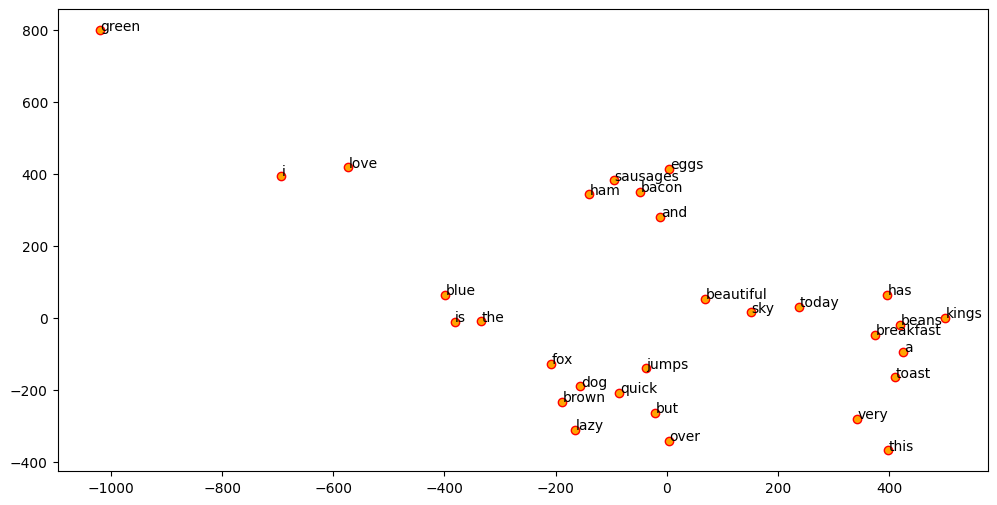

In [7]:
from sklearn.manifold import TSNE

words = w2v_model.wv.index_to_key ## get the word forms of voculary
wvs = w2v_model.wv[words] ## get embeddings of all word forms

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label,
                 xy=(x + 1, y + 1),
                 xytext=(0, 0),
                 textcoords='offset points')

- All trained word embeddings are included in `w2v_model.wv`.
- We can extract all word forms in the vocabulary from `w2v_model.wv.index2word`.
- We can easily extract embeddings for any specific words from `w2v_model.wv`.

In [ ]:
w2v_model.wv.index_to_key[:5]

['the', 'is', 'and', 'sky', 'blue']

In [ ]:
[w2v_model.wv[w] for w in w2v_model.wv.index_to_key[:5]]

[array([-1.0955971 ,  0.28981927, -1.114526  , -0.42339042,  0.6675717 ,
        -1.3750647 , -0.7091861 ,  0.11262629,  0.05587239, -0.69365185],
       dtype=float32),
 array([-0.8851927 ,  0.9595878 , -1.577396  , -0.11707135,  0.42077333,
        -1.6398208 , -0.19225189,  0.34423816,  0.61323863, -0.7688721 ],
       dtype=float32),
 array([-0.84449387,  0.55549985, -0.44748944, -0.00080588, -0.5059699 ,
         0.5889888 , -0.5186474 , -0.83325565,  0.63910156,  0.27831602],
       dtype=float32),
 array([-1.9146936 ,  0.02330735, -0.37303334,  1.1489565 , -1.944466  ,
        -0.8909217 , -0.15269955,  0.06232863,  0.87335736, -0.8871494 ],
       dtype=float32),
 array([-0.49765837,  0.33476138, -1.5775285 ,  0.16074066, -1.2337844 ,
        -0.6431138 , -0.911781  ,  0.91575366, -0.01303514, -0.17782535],
       dtype=float32)]

### From Word Embeddings to Document Embeddings

- With word embeddings, we can compute the **average embeddings** for the entire document, i.e., the ***document embeddings***.
- These document embeddings are also assumed to have included considerable semantic information of the document.
- We can for example use them for document classification/clustering.

In [ ]:
def average_word_vectors(words, model, vocabulary, num_features):

    feature_vector = np.zeros((num_features, ), dtype="float64")
    nwords = 0.

    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)

    return feature_vector


def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index_to_key)
    features = [
        average_word_vectors(tokenized_sentence, model, vocabulary,
                             num_features) for tokenized_sentence in corpus
    ]
    return np.array(features)

In [ ]:
w2v_feature_array = averaged_word_vectorizer(corpus=corpus_tokens,
                                             model=w2v_model,
                                             num_features=feature_size)
pd.DataFrame(w2v_feature_array, index=corpus_norm)

,0,1,2,3,4,5,6,7,8,9
the sky is blue and beautiful,-1.025673,0.385626,-1.049794,0.510430,-0.660862,-0.868236,-0.548901,0.089492,0.567460,-0.425037
love this blue and beautiful sky,-1.204774,0.458085,-0.833338,1.104553,-0.919012,-0.179183,-0.639440,0.066505,0.541388,-0.689463
the quick brown fox jumps over the lazy dog,-0.392979,-0.568204,-1.745686,-0.445058,0.459197,-1.097641,-0.019236,-0.410119,0.395439,-1.143568
a kings breakfast has sausages ham bacon eggs toast and beans,0.403289,0.133352,0.090500,-0.387340,-0.589835,0.508636,-1.155621,-0.795676,1.076691,-1.408591
i love green eggs ham sausages and bacon,-0.260290,-0.112252,-0.215950,0.544712,-0.439302,1.108033,-1.191799,-0.361297,0.810694,-1.341653
the brown fox is quick and the blue dog is lazy,-0.655273,-0.112480,-1.412061,-0.171668,0.275225,-1.128703,-0.291054,-0.052113,0.424552,-0.763964
the sky is very blue and the sky is very beautiful today,-1.168732,0.556899,-0.959907,0.521333,-0.719075,-1.211951,-0.400086,0.057257,0.723485,-0.610505
the dog is lazy but the brown fox is quick,-0.651009,-0.233851,-1.622870,-0.251843,0.412877,-1.314846,-0.215856,-0.195488,0.437747,-0.867432


- Let's cluster these documents based on their **document embeddings**.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

similarity_doc_matrix = cosine_similarity(w2v_feature_array)
similarity_doc_df = pd.DataFrame(similarity_doc_matrix)
similarity_doc_df

,0,1,2,3,4,5,6,7
0,1.000000,0.901241,0.561713,0.202711,0.330573,0.767413,0.983230,0.708357
1,0.901241,1.000000,0.313854,0.301785,0.583546,0.509708,0.864261,0.437844
2,0.561713,0.313854,1.000000,0.208633,0.144338,0.942269,0.561763,0.966901
3,0.202711,0.301785,0.208633,1.000000,0.822919,0.156876,0.196729,0.138610
4,0.330573,0.583546,0.144338,0.822919,1.000000,0.145031,0.266458,0.103276
5,0.767413,0.509708,0.942269,0.156876,0.145031,1.000000,0.766367,0.994382
6,0.983230,0.864261,0.561763,0.196729,0.266458,0.766367,1.000000,0.711530
7,0.708357,0.437844,0.966901,0.138610,0.103276,0.994382,0.711530,1.000000


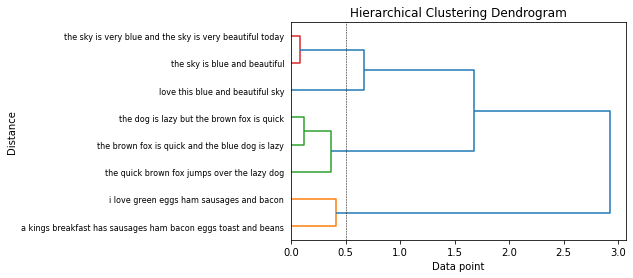

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_doc_matrix, 'ward')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z,
           labels=corpus_norm,
           leaf_rotation=0,
           leaf_font_size=8,
           orientation='right',
           color_threshold=0.5)
plt.axvline(x=0.5, c='k', ls='--', lw=0.5)

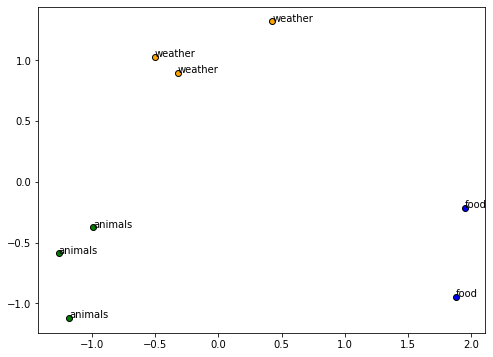

In [ ]:
## Other Clustering Methods

from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation()
ap.fit(w2v_feature_array)
cluster_labels = ap.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

## PCA Plotting
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
pcs = pca.fit_transform(w2v_feature_array)
labels = ap.labels_
categories = list(corpus_df['Category'])
plt.figure(figsize=(8, 6))

for i in range(len(labels)):
    label = labels[i]
    color = 'orange' if label == 0 else 'blue' if label == 1 else 'green'
    annotation_label = categories[i]
    x, y = pcs[i]
    plt.scatter(x, y, c=color, edgecolors='k')
    plt.annotate(annotation_label,
                 xy=(x + 1e-4, y + 1e-3),
                 xytext=(0, 0),
                 textcoords='offset points')

## Using Pre-trained Embeddings:  GloVe in `spacy`

In [ ]:
import spacy


nlp = spacy.load('en_core_web_sm',disable=['parse','entity'])

total_vectors = len(nlp.vocab.vectors)
print('Total word vectors:', total_vectors)

Total word vectors: 0


In [ ]:
print(spacy.__version__)

3.7.4


### Visualize GloVe word embeddings

- Let's extract the GloVe pretrained embeddings for all the words in our simple corpus.
- And we visualize their embeddings in a 2D plot via dimensional reduction.

:::{warning}
When using pre-trained embeddings, there are two important things:
- Be very careful of the **tokenization** methods used in your text preprocessing. If you use a very different word tokenization method, you may find a lot of **unknown** words that are not included in the pretrained model.
- Always check the **proportion of the unknown words** when vectorizing your corpus texts with pre-trained embeddings.
:::

In [ ]:
# get vocab of the corpus
unique_words = set(sum(corpus_tokens,[]))

# extract pre-trained embeddings of all words
word_glove_vectors = np.array([nlp(word).vector for word in unique_words])
pd.DataFrame(word_glove_vectors, index=list(unique_words))

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
fox,-1.063212,-1.183250,0.301696,0.807676,-0.038768,0.154243,0.943618,1.364022,0.090330,-0.779430,...,-0.005095,-0.514686,-1.359398,1.482487,-0.727252,-0.679084,1.143467,0.792079,0.315268,1.307671
i,-1.993811,-0.266060,-0.210171,-0.306937,-0.040056,-0.104719,2.012425,0.467140,0.367587,-0.688097,...,-0.367412,-0.188884,0.805613,0.037097,1.218038,-0.012631,0.766385,-0.338247,-0.670583,1.593813
toast,-0.511126,-1.450967,-0.677771,-0.366755,-0.637132,-0.223209,-0.398685,1.043327,0.483847,-0.570178,...,0.803359,0.164431,-1.173490,0.853853,-1.316678,0.347120,0.963565,1.096257,0.741655,0.422103
lazy,-1.349924,-1.008391,-0.377253,-0.534368,-0.737286,0.438626,0.275777,0.426540,-0.384913,-1.091948,...,-0.174179,0.558310,-0.641799,1.153934,1.125221,0.256873,0.825006,1.489886,0.163207,0.548743
brown,-0.876514,-1.404033,-0.920571,0.893427,0.632112,-0.000901,-0.270705,1.450481,1.094555,-1.343019,...,0.900336,0.143640,-0.650321,0.453211,-0.052952,0.508944,1.487840,0.490526,0.128305,1.059052
jumps,-0.809290,1.028574,0.142155,1.195198,-0.892427,-0.613777,1.158633,0.491403,0.826156,-0.908024,...,-0.968900,0.572921,0.224080,-0.167507,0.545909,0.819458,-0.053826,0.179755,-0.520523,1.177554
over,-0.440351,-0.957340,-0.288661,-0.784095,-0.453102,-0.260627,-0.156899,1.161451,0.216041,-0.119296,...,0.818817,-0.112224,0.002977,0.198638,-0.664965,1.044688,-0.332885,1.113893,-0.737987,-1.248392
quick,-0.808210,-1.721901,-0.849621,-0.323725,-0.733217,-0.200044,0.316566,1.306869,-0.375950,-0.764119,...,-0.344666,0.631241,-0.250259,1.216616,1.283587,0.036267,1.192511,1.531458,-1.331323,0.637828
sky,-1.052381,-0.623967,-1.247646,0.173333,-0.280415,0.423770,1.136191,1.594746,-0.112143,0.024372,...,-0.081686,-0.557614,-1.442796,1.067169,-0.304729,-0.230831,1.200995,0.827422,0.558651,1.421518
but,-0.617007,-1.335470,-1.274921,0.456699,0.492686,0.975720,-0.089738,0.473519,0.433252,1.396278,...,0.546477,0.888823,-0.181895,-0.218617,-0.720274,0.372221,-0.464548,0.677568,-1.169354,-0.445014


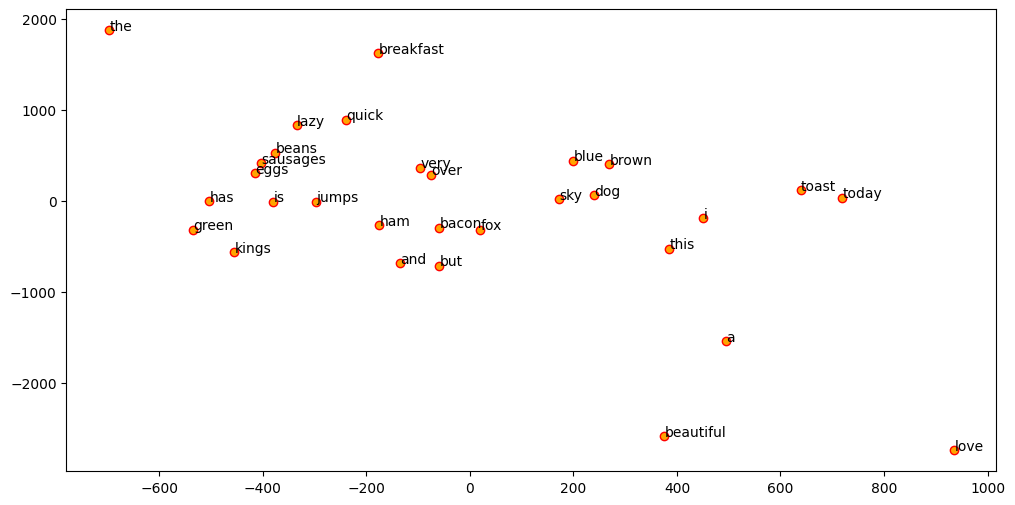

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=1)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_glove_vectors)
labels = unique_words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label,
                 xy=(x + 1, y + 1),
                 xytext=(0, 0),
                 textcoords='offset points')


- It is clear to see that when embeddings are trained based on a larger corpus, they reflect more lexical semantic contents.
- Semantically similar words are indeed closer to each other in the 2D plot.

## References

- Sarkar (2020) Ch 4 Feature Engineering for Text Representation
- Major Readings:
    - Harris,Zellig. 1956. [Distributional structure](http://www.tandfonline.com/doi/pdf/10.1080/00437956.1954.11659520).
    - Bengio, Yoshuan, et. al. 2003. [A Neural Probabilistic Language Model](http://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf).
    - Collobert, Ronana and Jason Weston. 2008. [A Unified Architecture for Natural Language Processing: Deep Neural Networks with Multitask Learning](https://ronan.collobert.com/pub/matos/2008_nlp_icml.pdf).
    - Schwenk, Holger. 2007.[Continuous space language models](https://pdfs.semanticscholar.org/0fcc/184b3b90405ec3ceafd6a4007c749df7c363.pdf).
    - Mikolov, Tomas, et al. 2013. [Efficient estimation of word representations in vector space](https://arxiv.org/abs/1301.3781). arXiv preprint arXiv:1301.3781.
    - Mikolov, Tomas, et al. 2013. [Distributed representations of words and phrases and their compositionally](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf). *Advances in neural information processing systems*. 2013.
    - Baroni, Marco, et. al. 2014. [Don’t count, predict! A systematic comparison of context-counting vs. context-predicting semantic vectors](https://www.aclweb.org/anthology/P14-1023/). *ACL*(1).
    - Pennington, Jeffrey, et al. 2014. [GloVe: Global Vectors for Word Representation](https://nlp.stanford.edu/pubs/glove.pdf). *EMNLP*. Vol. 14.
    - Bojanowski, P., Grave, E., Joulin, A., & Mikolov, T. (2017). [Enriching word vectors with subword information](https://doi.org/10.1162/tacl_a_00051). *Transactions of the Association for Computational Linguistics*, 5, 135-146.
- [GloVe Project Official Website](https://nlp.stanford.edu/projects/glove/): You can download their pre-trained GloVe models.
- [FastText Project Website](https://fasttext.cc/docs/en/english-vectors.html): You can download the English pre-trained FastText models.
